# ATOC5860 - linear_regression_grades - Lecture #4
### coded by Prof. Jennifer Kay (University of Colorado)
### last updated February 3, 2023

In [1]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import xarray
import pandas as pd   ##pandas reads in .csv.
from scipy import stats
import seaborn as sns  ### seaborn just makes things pretty -- no new typing
sns.set_style('whitegrid')  ###  change away from grey grid (seaborn default) to white grid

In [2]:
filename = 'class_grades_detailed_anonymous.csv'
data=pd.read_csv(filename,sep=',')
#print(data)

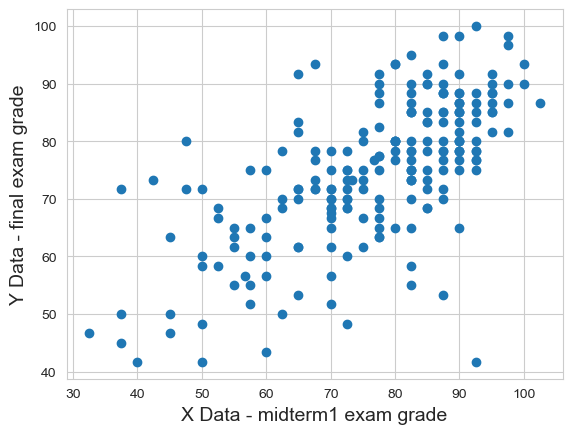

In [3]:
### Assign X and Y data
xdata=data['midterm1'] ## predictor, independent variable
ydata=data['final'] ## predicted by predictor, dependent variable; y=f(x)
N=len(xdata)
plt.scatter(xdata,ydata);
plt.xlabel('X Data - midterm1 exam grade',size=14);
plt.ylabel('Y Data - final exam grade',size=14);

In [4]:
### Calculate the correlation statistics
slope, intercept, r_value, p_value, std_err = stats.linregress(xdata,ydata)
print('scipy.stats.linregress slope or regression coefficient: ',round(slope,2))
print('scipy.stats.linregress y-intercept: ',round(intercept,2))
print('scipy.stats.linregress r_value or correlation coefficient: ',round(r_value,2))

scipy.stats.linregress slope or regression coefficient:  0.57
scipy.stats.linregress y-intercept:  31.29
scipy.stats.linregress r_value or correlation coefficient:  0.66


In [5]:
### Test the null hypothesis that the true correlation between midterm1 grade and final exam grade is positive.
### HO: high midterm1 grade leads to a high final exam grade
### Need to use fisher-z because the hypothesis is that the correlation is positive (not zero).

## Use Fisher-Z to calculate Z, sigma_Z
Z=0.5*np.log((1+r_value)/(1-r_value))
sigma_Z=1/np.sqrt(N-3)
print('Z:',round(Z,2))
print('sigma_Z:',round(sigma_Z,2))

## Find 95% confidence intervals on the true correlation.
tstat95=stats.t.ppf(0.975,N-2)  ## two-sided 95%
min_Z_value=Z-tstat95*sigma_Z
max_Z_value=Z+tstat95*sigma_Z
min_r_value=np.tanh(min_Z_value)
max_r_value=np.tanh(max_Z_value)
print('Number of students:',N)
print('r_value:',round(r_value,2))
print('min_r_value:',round(min_r_value,2))
print('max_r_value:',round(max_r_value,2))

print('Cannot reject null hypothesis; 95% confidence bounds rule out correlation=0')
print('Results consistent with the null hypothesis that a high midterm 1 grade leads to a high final exam grade.')

Z: 0.8
sigma_Z: 0.07
Number of students: 211
r_value: 0.66
min_r_value: 0.58
max_r_value: 0.73
Cannot reject null hypothesis; 95% confidence bounds rule out correlation=0
Results consistent with the null hypothesis that a high midterm 1 grade leads to a high final exam grade.
